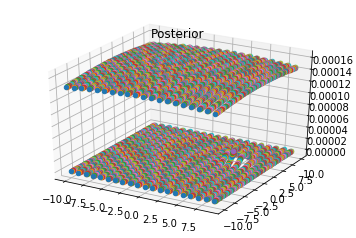

In [17]:
import numpy as np
import numpy.linalg as la
from scipy.integrate import dblquad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
PI = np.pi
norm = 0


def compute_pseudoinverse (X):
    ''' Computes the pseudoinverse required for computing the weight densities.'''
    
    return np.matmul (la.inv (np.matmul (X.T, X)), X.T)

def p (weights, mean):
    ''' Computes the weight densities according to a normal distribution
    with given mean and identity covariance matrix.'''
    
    D = weights.shape[0]
    covariance = 1
    covariance_matrix = covariance*np.identity (D)
    
    coefficient = (2*PI)**(-D/2) * (la.det (covariance_matrix))**(-.5)
    exponential = np.exp (-.5*np.dot((weights-mean).T, np.dot (la.inv (covariance_matrix), weights-mean)))
    return coefficient * exponential

def likelihood (data, mean):
    ''' Under i.i.d. sampling, computes the likelihood of obtaining the features and
    target values given a mean.'''
    
    inputs = data['inputs']
    outputs = data['outputs']
    
    pseudoinverse = compute_pseudoinverse (inputs)
    return p (np.matmul (pseudoinverse, outputs), mean)

def prior (mean):
    ''' Computes the prior distribution for the mean, under the assumption that it is normal
    with high covariance and zero mean.'''
    
    D = mean.shape[0]
    covariance = 1000
    covariance_matrix = covariance*np.identity (D)
    
    
    coefficient = (2*PI)**(-D/2) * (la.det (covariance_matrix))**(-.5)
    exponential = np.exp (-.5*np.dot((mean).T, np.dot (la.inv (covariance_matrix), mean)))
    return coefficient * exponential

def posterior (data, mean):
    ''' Using Bayes Theorem, computes the posterior distribution for the mean,
    by multiplying the likelihood and prior and normalizing.'''
    
    def function (x, y):
        return likelihood (data, np.array([x,y])) * prior (np.array([x,y]))
    def gfun(x):
        return -100
    def hfun(x):
        return 100
    
    #norm = 1 / dblquad (function, -100, 100, gfun, hfun)[0]
    
    return 1 * likelihood (data, mean) * prior (mean)

def main ():
    ''' Lets x be uniformly distributed on [-10, 10], computes y = 5 + 3x, and generates
    a data set with features and target values. Uses Bayes Theorem to compute the appropriate
    mean for the weights. Plots the posterior mean densities.'''
    
    inputs = np.array([[1, np.random.uniform(-10, 10)] for time in range (100)])
    outputs = np.array([np.dot ([5, 3], x) for x in inputs])
    data = {'inputs': inputs, 'outputs': outputs}
    
    means0 = np.arange (-10, 10, 1)
    means1 = np.arange (-10, 10, .1)
    
    for mean0 in means0:
        for mean1 in means1:
            mean = np.array([mean0, mean1])
            ax.scatter(mean0, mean1, prior(mean))
    
    ax.set_title('Prior')
    
    for mean0 in means0:
        for mean1 in means1:
            mean = np.array([mean0,mean1])
            ax.scatter(mean0, mean1, posterior(data,mean))
    ax.set_title('Posterior')
    plt.show()
            
    
    return

main()